<a href="https://colab.research.google.com/github/dogpool/AppliedMachineLearningNortheastern/blob/main/CrowdfundingAppliedMachineLearningPROJECT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as  pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
from numpy import sort
from xgboost import XGBRegressor
from xgboost import plot_tree
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor


In [ ]:
#Load the dataset

from google.colab import drive
drive.mount('/content/gdrive')

crowdfunding_df = pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/Crowdfunding campaign.xlsx")
crowdfunding_df.head() # see if it is loaded properly
crowdfunding_df = crowdfunding_df.fillna(method='ffill')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc378db890>,
      dtype=object)

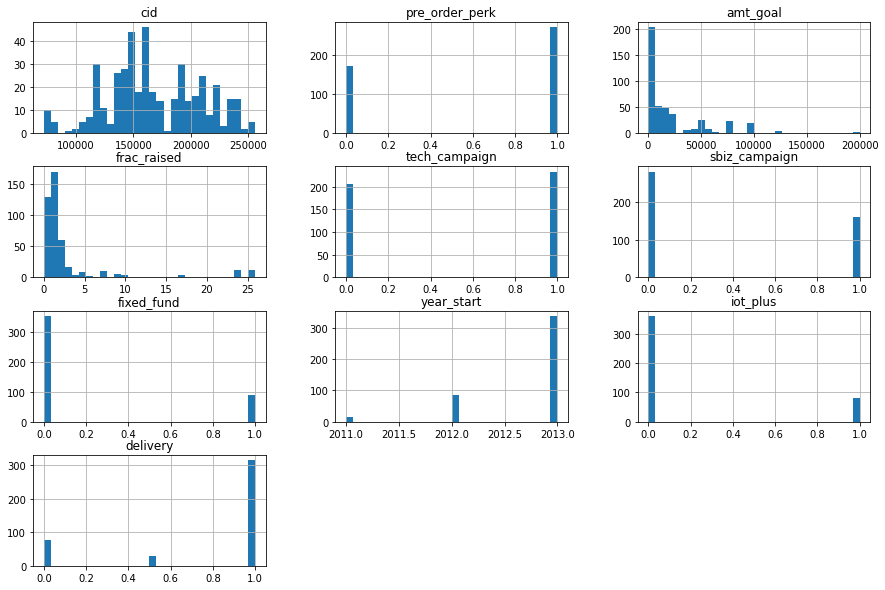

In [ ]:
# Visualize the datapoints
crowdfunding_df.hist(bins=30, figsize=(15, 10))

In [ ]:
crowdfunding_df['iot_plus'].describe()

count       439.000000
mean      22841.232346
std       31459.342081
min         500.000000
25%        2000.000000
50%       10000.000000
75%       25000.000000
max      200000.000000
Name: amt_goal, dtype: float64

In [ ]:
crowdfunding_df.dtypes

cid                 int64
pre_order_perk      int64
amt_goal            int64
frac_raised       float64
tech_campaign       int64
sbiz_campaign       int64
fixed_fund        float64
state              object
year_start          int64
iot_plus          float64
delivery          float64
dtype: object

In [ ]:
# Split the data into X & y, and testing and training data

X = crowdfunding_df[['pre_order_perk', 'amt_goal', 'tech_campaign', 'sbiz_campaign', 'fixed_fund', 'iot_plus']]
y = crowdfunding_df['frac_raised']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 30, random_state=0)

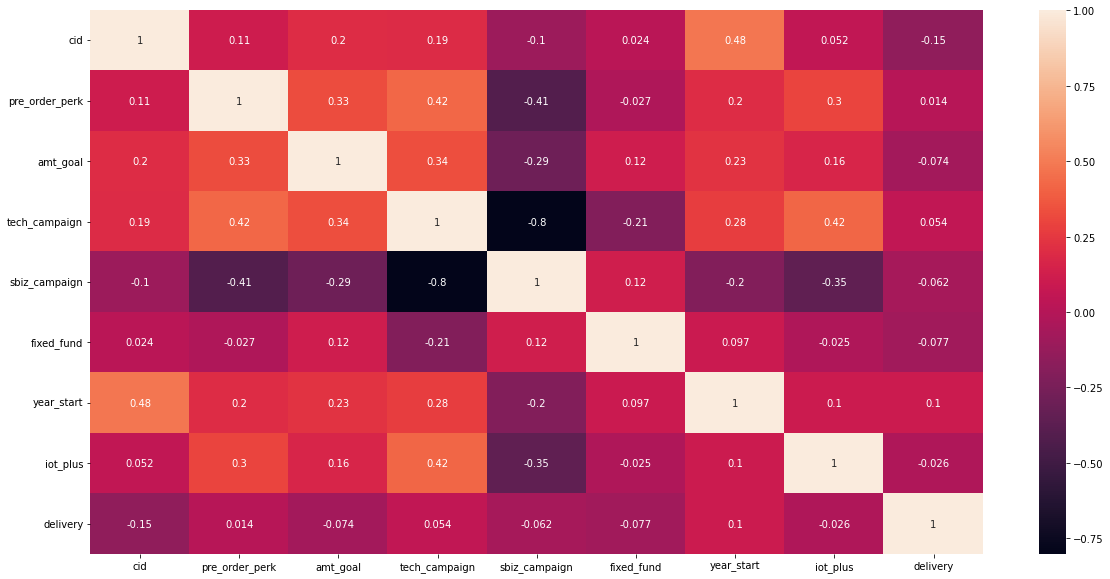

In [ ]:
# Correlations

plt.figure(figsize=(20,10)) 
sns.heatmap(crowdfunding_df.drop(columns = ['frac_raised'], axis = 1).corr(), annot=True)

In [ ]:
## Decision Tree Regression

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Predict y_pred, and print error measurements
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print('RMSE: ', mse**0.5)

MSE:  18.609856154714056
RMSE:  4.313914249810033


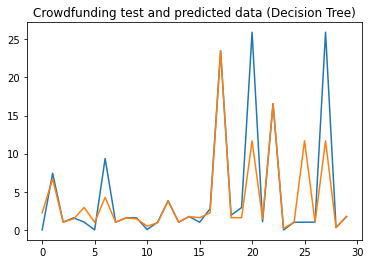

In [ ]:
# Visualize predicted vs actual
x_axis = range(len(y_test))
plt.plot(x_axis, y_test, label = 'Original Data')
plt.plot(x_axis, y_pred, label = 'Predict')
plt.title('Crowdfunding test and predicted data (Decision Tree)')
plt.show()

In [ ]:
# XGBoost Regression Model

xgb_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
# Training Score
from sklearn import metrics
training_score = xgb_model.score(X_train, y_train)
print(training_score)

0.6700060087716558


In [ ]:
# MSE and RMSE
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print('RMSE: ', mse**0.5) 


MSE:  21.00440587628348
RMSE:  4.583056390257868


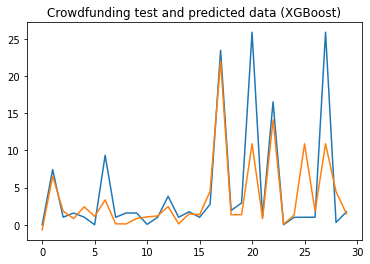

In [ ]:
# Plot predicted vs actual 
x_axis = range(len(y_test))
plt.plot(x_axis, y_test, label = 'Original Data')
plt.plot(x_axis, y_pred, label = 'Predict')
plt.title('Crowdfunding test and predicted data (XGBoost)')
plt.show()

<BarContainer object of 6 artists>

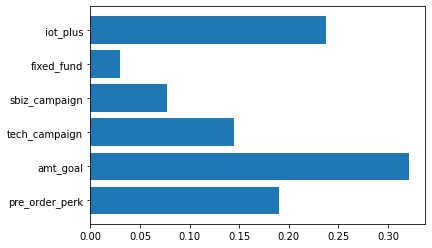

In [ ]:
plt.barh(['pre_order_perk', 'amt_goal', 'tech_campaign', 'sbiz_campaign', 'fixed_fund', 'iot_plus'], xgb_model.feature_importances_)

In [ ]:
from sklearn.svm import SVR 

#creating model
svr = SVR()
# fit the model
svr.fit(X_train, y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Training Score
from sklearn import metrics
training_score1 = svr.score(X_train, y_train)
print(training_score1)



-0.09469805670685894


In [ ]:
# Predict y_pred, and print error measurements
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print('RMSE: ', mse**0.5)

MSE:  69.90957982087465
RMSE:  8.36119487997228
